In [113]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import os

In [114]:
g = 9.81
R = 1.
m0 = 1.

In [115]:
def czytaj(file_path):
    with open(file_path, 'r') as file:
        data = []
        for line in file:
            values = list(map(float, line.split()))
            data.append(values)
        data = np.array(data)
        data = data.T
        return data

In [116]:
data = []
folder = ''
for i in range(5):
    plik = f'lab1_wahadlo_{i}.txt'
    sciezka = os.path.join(folder, plik)
    if os.path.exists(sciezka):
        print(f"Otwieranie {plik}")
        data.append(czytaj(sciezka))
    else:
        print(f"nie istnieje.")

Otwieranie lab1_wahadlo_0.txt
Otwieranie lab1_wahadlo_1.txt
Otwieranie lab1_wahadlo_2.txt
Otwieranie lab1_wahadlo_3.txt
Otwieranie lab1_wahadlo_4.txt


In [117]:
t = []
phi = []
omega = []
T = []
U = []
for i in range(5):
    t.append(data[i][0])
    phi.append(data[i][1])
    omega.append(data[i][2])
    T.append(m0/2 * R**2 * data[i][2]**2)
    U.append(-m0*g*R*np.cos(data[i][1]))

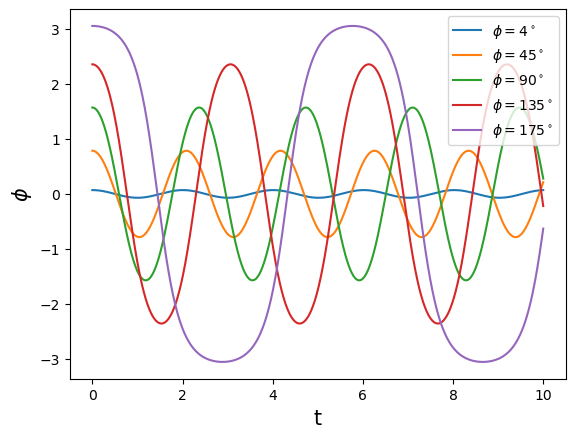

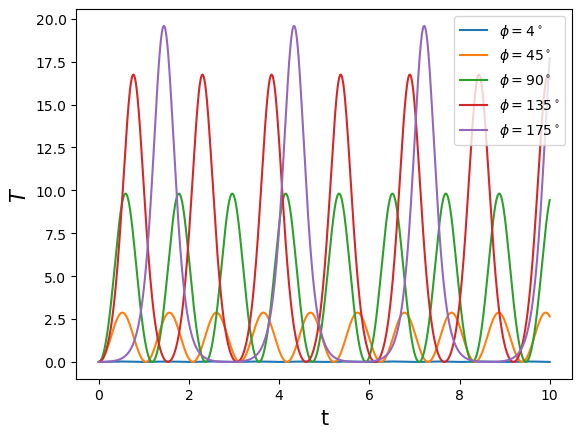

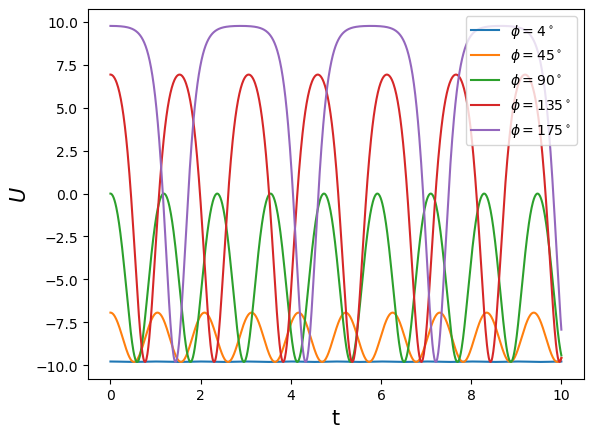

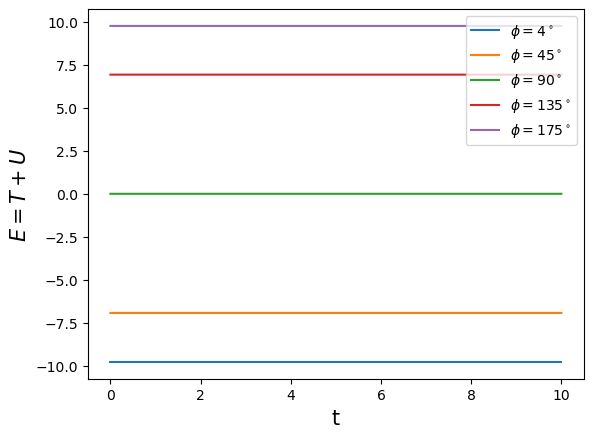

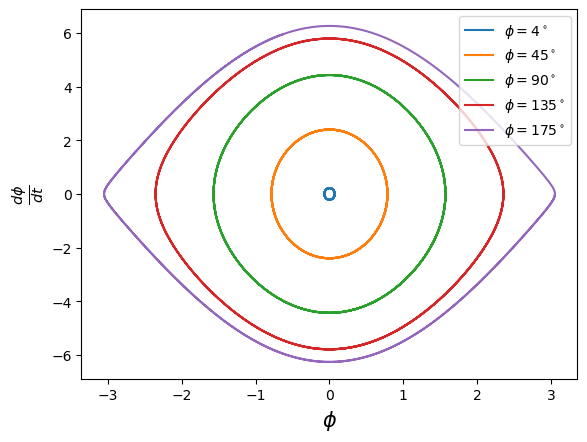

In [118]:
fs=15

phi_value = [4,45,90,135,175]
for i in range(5):
    label = fr'$\phi = {phi_value[i]}^\circ$'
    plt.plot(t[i],phi[i], label=label)
plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$\phi$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

phi_value = [4,45,90,135,175]
for i in range(5):
    label = fr'$\phi = {phi_value[i]}^\circ$'
    plt.plot(t[i],T[i], label=label)
plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$T$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

phi_value = [4,45,90,135,175]
for i in range(5):
    label = fr'$\phi = {phi_value[i]}^\circ$'
    plt.plot(t[i],U[i], label=label)
plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$U$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

phi_value = [4,45,90,135,175]
for i in range(5):
    label = fr'$\phi = {phi_value[i]}^\circ$'
    plt.plot(t[i],U[i]+T[i], label=label)
plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$E = T+U$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

phi_value = [4,45,90,135,175]
for i in range(5):
    label = fr'$\phi = {phi_value[i]}^\circ$'
    plt.plot(phi[i],omega[i], label=label)
plt.xlabel(r'$\phi$', fontsize=fs)
plt.ylabel(r'$\frac{d\phi}{dt}$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

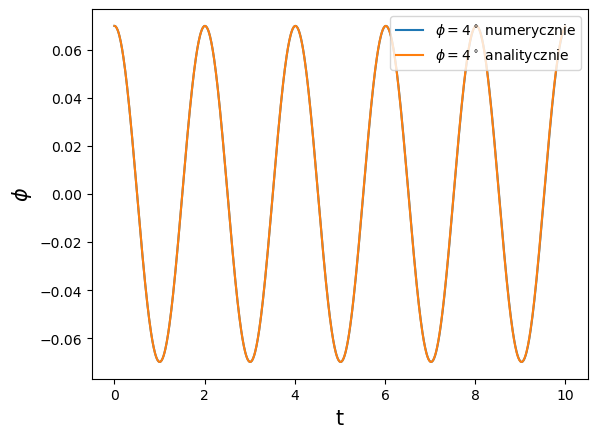

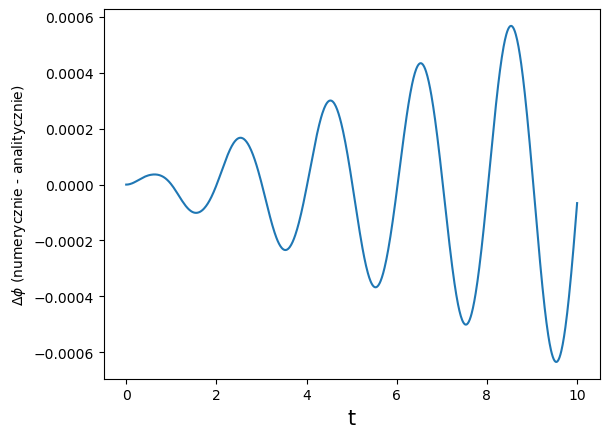

In [128]:
label = fr'$\phi = {phi_value[i]}^\circ$ numerycznie'
plt.plot(t[0],phi[0], label=label)

label2 = fr'$\phi = {phi_value[i]}^\circ$ analitycznie'
plt.plot(t[0], phi[0][0]*np.cos(m.sqrt(g/R)*t[0]), label = label2)

plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$\phi$', fontsize=fs)
plt.legend(loc='upper right')
plt.show()

plt.plot(t[0], phi[0]-phi[0][0]*np.cos(m.sqrt(g/R)*t[0]))

plt.xlabel('t', fontsize=fs)
plt.ylabel(r'$\Delta \phi$ (numerycznie - analitycznie)', fontsize=fs-5)
plt.show()

In [120]:
i=2
sign = np.sign(omega[0][1])
okres = [0,0]
licz = 0
for i in range(omega[0].size-2) :
    if np.sign(omega[0][i+2]) != sign :
        if licz == 0 :
            okres[0] = t[0][i+2]
            licz+=1
        else :
            okres[1] = t[0][i+2]
            print(i)
            break

okres

100


[1.01, 1.02]

In [121]:
okres = []
for i in range(5):
    sign_changes = np.where(np.diff(np.sign(omega[i])) == 2)
    okres.append(np.diff(t[i][sign_changes]).mean())

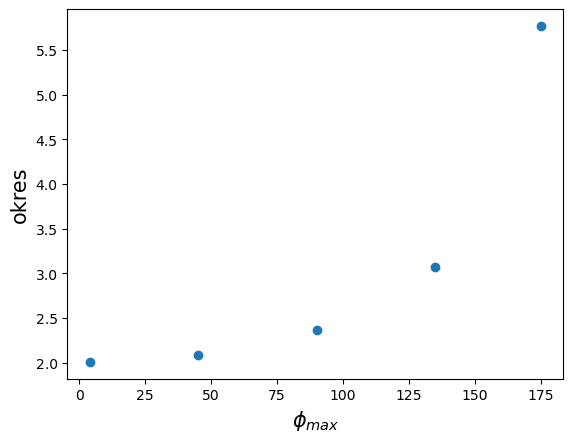

In [122]:
plt.plot(phi_value, okres, 'o')
plt.xlabel(r'$\phi_{max}$', fontsize=fs)
plt.ylabel('okres', fontsize=fs)
plt.show()